In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind


In [2]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [4]:
df['Total Charges'].value_counts()

,count
Total Charges,
20.2,11
,11
19.75,9
20.05,8
19.65,8
...,...
394.1,1
7589.8,1
905.55,1


**Exploratory Data Analysis(EDA)**

Text(0.5, 1.0, 'Churn Distribution')

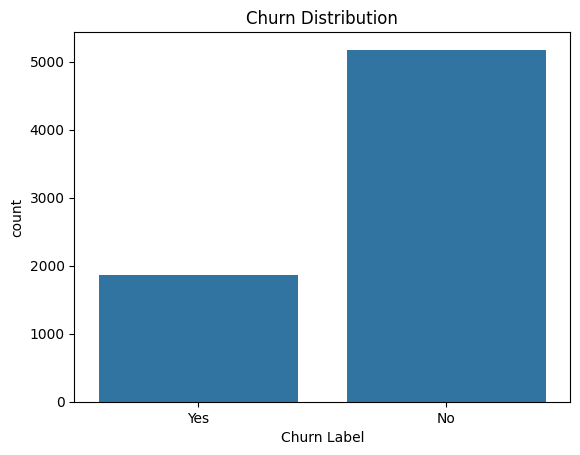

In [5]:
sns.countplot(data = df, x = 'Churn Label')
plt.title('Churn Distribution')

The dataset is imbalanced, with significantly more non-churned customers. Business impact is still high since churn impacts revenue.

<Axes: xlabel='Churn Label', ylabel='Monthly Charges'>

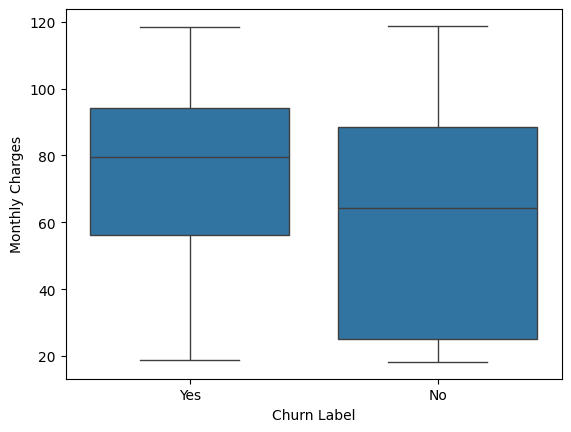

In [6]:
sns.boxplot(data = df, x='Churn Label', y = 'Monthly Charges')

Customers who churned (Yes) tend to have higher monthly charges

This suggests that pricing strategy may be a driver of churn and needs optimization.

**Chi - Square Test** ,,, Check if Categorical features are associated with Churn

In [7]:
cat_vars = ['Gender', 'Senior Citizen', 'Internet Service', 'Contract', 'Payment Method']

for col in cat_vars:
    ct = pd.crosstab(df[col], df['Churn Label'])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Chi-Square Test for {col} → p-value: {p:.4f}")


Chi-Square Test for Gender → p-value: 0.4866
Chi-Square Test for Senior Citizen → p-value: 0.0000
Chi-Square Test for Internet Service → p-value: 0.0000
Chi-Square Test for Contract → p-value: 0.0000
Chi-Square Test for Payment Method → p-value: 0.0000


Significance Level (α): 0.05

If p-value < 0.05 → there's a statistically significant association with churn

If p-value > 0.05 → there's no strong association

So here **Gender** column is not statistically associated with customer Churn

being a **senior citizen** affects churn

the type of **internet service** impacts churn likelihood

customers with month-to-month **contracts** churn more

**payment method** influences churn behavior

**T-Test** ,, Compare the mean of numerical features for churned vs non-chruned customers

In [8]:
num_vars = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

for col in num_vars:
    group1 = df[df['Churn Label'] == 'Yes'][col]
    group2 = df[df['Churn Label'] == 'No'][col]
    t_stat, p_val = ttest_ind(group1, group2)
    print(f"T-Test for {col} → p-value: {p_val:.4f}")


T-Test for Tenure Months → p-value: 0.0000
T-Test for Monthly Charges → p-value: 0.0000


ValueError: data type <class 'numpy.object_'> not inexact

In [9]:
df['Total Charges'].dtype


dtype('O')

In [10]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(subset=['Total Charges'], inplace=True)


In [11]:
num_vars = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

for col in num_vars:
    group1 = df[df['Churn Label'] == 'Yes'][col]
    group2 = df[df['Churn Label'] == 'No'][col]
    t_stat, p_val = ttest_ind(group1, group2)
    print(f"T-Test for {col} → p-value: {p_val:.4f}")


T-Test for Tenure Months → p-value: 0.0000
T-Test for Monthly Charges → p-value: 0.0000
T-Test for Total Charges → p-value: 0.0000
T-Test for Churn Score → p-value: 0.0000
T-Test for CLTV → p-value: 0.0000


T-Test Interpretation (α = 0.05)

Customers who churn have significantly **shorter tenure** — churners leave early

Churners have **higher monthly bills**, which may lead to dissatisfaction

Since they leave early, churners have **lower total charges** overall

**Strong statistical difference** — this score reliably separates churn groups

Churners have significantly **lower lifetime value**, validating this as a key risk indicator

Text(0.5, 1.0, 'CLTV vs Churn')

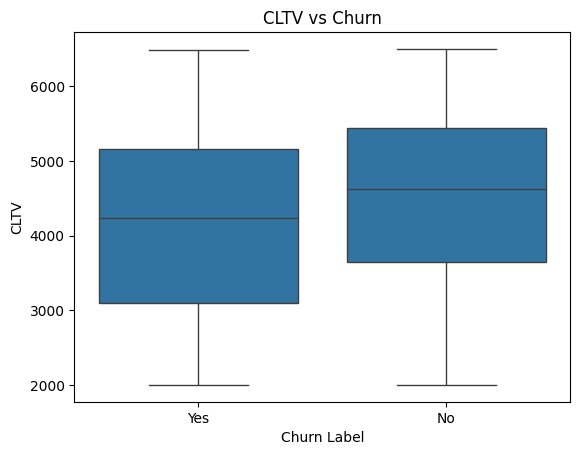

In [12]:
sns.boxplot(data=df, x='Churn Label', y='CLTV')
plt.title('CLTV vs Churn')


"No Churn" group has higher CLTV on average than "Yes Churn"

Customers who didn't churn have a higher customer lifetime value.

<Axes: xlabel='Internet Service', ylabel='count'>

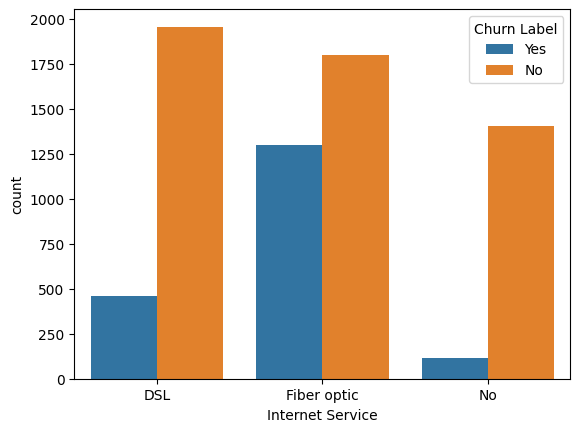

In [15]:
sns.countplot(data=df, hue='Churn Label', x='Internet Service')


DSL	Most users didn't churn (tall orange bar), only few did (short blue)

Fiber Optic	More churners than DSL, but still more non-churners overall — Orange bar is taller

No Internet	Very few people churn (blue is nearly zero) — most either inactive or not active customers

**Conclusion:**
This analysis showed that churn is strongly associated with features like contract type, monthly charges, and tenure. Price sensitivity and short-term contracts are major churn drivers. These findings can help businesses design better retention strategies.
